In [ ]:
import torch
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim  # For all Optimization algorithms, SGD, Adam, etc.
import torchvision.transforms as transforms  # Transformations we can perform on our dataset
import torchvision
import os
import pandas as pd
from skimage import io
from torch.utils.data import (
    Dataset,
    DataLoader,
)  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/Dataset C.zip"

Streaming output truncated to the last 5000 lines.
  inflating: training-c/c19299.png   
  inflating: training-c/c19300.png   
  inflating: training-c/c19301.png   
  inflating: training-c/c19302.png   
  inflating: training-c/c19303.png   
  inflating: training-c/c19304.png   
  inflating: training-c/c19305.png   
  inflating: training-c/c19306.png   
  inflating: training-c/c19307.png   
  inflating: training-c/c19308.png   
  inflating: training-c/c19309.png   
  inflating: training-c/c19310.png   
  inflating: training-c/c19311.png   
  inflating: training-c/c19312.png   
  inflating: training-c/c19313.png   
  inflating: training-c/c19314.png   
  inflating: training-c/c19315.png   
  inflating: training-c/c19316.png   
  inflating: training-c/c19317.png   
  inflating: training-c/c19318.png   
  inflating: training-c/c19319.png   
  inflating: training-c/c19320.png   
  inflating: training-c/c19321.png   
  inflating: training-c/c19322.png   
  inflating: training-c/c19323.png   

In [ ]:
class CustomDatasetmine(Dataset):
  def __init__(self, csv_file, root_dir, transform=None):
    self.annotations = pd.read_csv(csv_file)
    self.root_dir = root_dir
    self.transform = transform
  def __len__(self):
    return len(self.annotations)
  def __getitem__(self, index):
    img_path = os.path.join(self.root_dir, self.annotations.iloc[index,0])
    image= io.imread(img_path)
    y_label = torch.tensor(int(self.annotations.iloc[index, 3]))

    if self.transform:
      image=self.transform(image)
    return (image, y_label)

In [ ]:
data = CustomDatasetmine("/content/training-c.csv","/content/training-c", transforms.Compose([transforms.ToPILImage(), transforms.Resize(size=(32, 32)), transforms.ToTensor()]))
train_set, test_set = torch.utils.data.random_split(data,[19438,4860])

In [ ]:
data.__len__()

24298

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [ ]:
# Hyperparameters
batch_size = 20
num_iters = 20000
input_dim = 32*32 # num_features = 1024
num_hidden = 200
output_dim = 10

learning_rate = 0.01


num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        # x = x.view(x.shape[0], -1)
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)

        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)


# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 32*32).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 32*32).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iteration_loss.append(loss.item())
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3056282997131348. Accuracy: 10.1440329218107
Iteration: 1000. Loss: 2.303269863128662. Accuracy: 9.506172839506172
Iteration: 1500. Loss: 2.3021576404571533. Accuracy: 9.506172839506172
Iteration: 2000. Loss: 2.299071788787842. Accuracy: 10.1440329218107
Iteration: 2500. Loss: 2.3007962703704834. Accuracy: 10.1440329218107
Iteration: 3000. Loss: 2.3037612438201904. Accuracy: 9.506172839506172
Iteration: 3500. Loss: 2.3045220375061035. Accuracy: 9.506172839506172
Iteration: 4000. Loss: 2.2993814945220947. Accuracy: 10.205761316872428
Iteration: 4500. Loss: 2.301724910736084. Accuracy: 10.164609053497943
Iteration: 5000. Loss: 2.30645489692688. Accuracy: 9.506172839506172
Iteration: 5500. Loss: 2.3082733154296875. Accuracy: 10.1440329218107
Iteration: 6000. Loss: 2.310271739959717. Accuracy: 9.506172839506172
Iteration: 6500. Loss: 2.3033502101898193. Accuracy: 10.205761316872428
Iteration: 7000. Loss: 2.303288221359253. Accuracy: 9.506172839506172
Iteration: 7500

[2.3056282997131348, 2.303269863128662, 2.3021576404571533, 2.299071788787842, 2.3007962703704834, 2.3037612438201904, 2.3045220375061035, 2.2993814945220947, 2.301724910736084, 2.30645489692688, 2.3082733154296875, 2.310271739959717, 2.3033502101898193, 2.303288221359253, 2.304471492767334, 2.3000454902648926, 2.303055763244629, 2.30180287361145, 2.304140567779541, 2.296398162841797, 2.3034632205963135, 2.2996745109558105, 2.2988948822021484, 2.3074820041656494, 2.30637788772583, 2.3026182651519775, 2.304921865463257, 2.3019137382507324, 2.3041772842407227, 2.3082003593444824, 2.301858901977539, 2.309138536453247, 2.299330949783325, 2.3014206886291504, 2.302396535873413, 2.296820878982544, 2.3017117977142334, 2.3042452335357666]


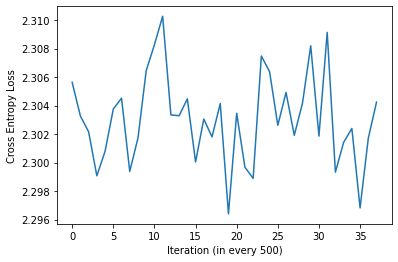

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
# Hyperparameters
batch_size = 100
num_iters = 40000
input_dim = 32*32 # num_features = 1024
num_hidden = 500
output_dim = 10

learning_rate = 0.01


num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        # x = x.view(x.shape[0], -1)
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)

        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)


# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 32*32).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 32*32).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iteration_loss.append(loss.item())
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3030261993408203. Accuracy: 10.205761316872428
Iteration: 1000. Loss: 2.3034138679504395. Accuracy: 9.506172839506172
Iteration: 1500. Loss: 2.3038461208343506. Accuracy: 9.506172839506172
Iteration: 2000. Loss: 2.303217887878418. Accuracy: 9.506172839506172
Iteration: 2500. Loss: 2.3008522987365723. Accuracy: 9.506172839506172
Iteration: 3000. Loss: 2.3004791736602783. Accuracy: 9.506172839506172
Iteration: 3500. Loss: 2.3029370307922363. Accuracy: 9.506172839506172
Iteration: 4000. Loss: 2.3041505813598633. Accuracy: 9.506172839506172
Iteration: 4500. Loss: 2.302785873413086. Accuracy: 9.506172839506172
Iteration: 5000. Loss: 2.302225112915039. Accuracy: 9.506172839506172
Iteration: 5500. Loss: 2.304800510406494. Accuracy: 9.506172839506172
Iteration: 6000. Loss: 2.300715684890747. Accuracy: 9.506172839506172
Iteration: 6500. Loss: 2.3007304668426514. Accuracy: 9.506172839506172
Iteration: 7000. Loss: 2.3025705814361572. Accuracy: 9.506172839506172
Iteration: 

[2.3030261993408203, 2.3034138679504395, 2.3038461208343506, 2.303217887878418, 2.3008522987365723, 2.3004791736602783, 2.3029370307922363, 2.3041505813598633, 2.302785873413086, 2.302225112915039, 2.304800510406494, 2.300715684890747, 2.3007304668426514, 2.3025705814361572, 2.3030529022216797, 2.3028783798217773, 2.3015854358673096, 2.302371025085449, 2.30289888381958, 2.3036603927612305, 2.3022544384002686, 2.3012442588806152, 2.303285837173462, 2.303929328918457, 2.3038809299468994, 2.3045153617858887, 2.3006813526153564, 2.3012964725494385, 2.301466703414917, 2.3020851612091064, 2.303194046020508, 2.2987990379333496, 2.301602840423584, 2.3039886951446533, 2.3036086559295654, 2.301877737045288, 2.3029417991638184, 2.3038394451141357, 2.303943395614624, 2.301882266998291, 2.3025901317596436, 2.3018643856048584, 2.3050477504730225, 2.302532434463501, 2.3015127182006836, 2.302441120147705, 2.301285743713379, 2.3011579513549805, 2.302769422531128, 2.3023457527160645, 2.3002490997314453,

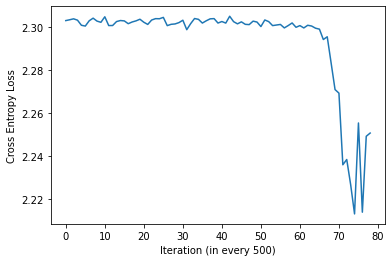

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
# Hyperparameters
batch_size = 100
num_iters = 70000
input_dim = 32*32 # num_features = 1024
num_hidden = 1000
output_dim = 10

learning_rate = 0.01


num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

      

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        # x = x.view(x.shape[0], -1)
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)

     
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)


# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 32*32).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 32*32).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)    
         
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iteration_loss.append(loss.item())
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.301755428314209. Accuracy: 9.218106995884774
Iteration: 1000. Loss: 2.303426504135132. Accuracy: 10.205761316872428
Iteration: 1500. Loss: 2.303414821624756. Accuracy: 9.897119341563785
Iteration: 2000. Loss: 2.3015811443328857. Accuracy: 9.218106995884774
Iteration: 2500. Loss: 2.3017938137054443. Accuracy: 9.218106995884774
Iteration: 3000. Loss: 2.296748399734497. Accuracy: 11.419753086419753
Iteration: 3500. Loss: 2.3005764484405518. Accuracy: 9.197530864197532
Iteration: 4000. Loss: 2.30025577545166. Accuracy: 19.609053497942387
Iteration: 4500. Loss: 2.3029749393463135. Accuracy: 16.090534979423868
Iteration: 5000. Loss: 2.3027732372283936. Accuracy: 15.637860082304528
Iteration: 5500. Loss: 2.299062728881836. Accuracy: 9.238683127572017
Iteration: 6000. Loss: 2.2965989112854004. Accuracy: 11.049382716049383
Iteration: 6500. Loss: 2.300126075744629. Accuracy: 9.465020576131687
Iteration: 7000. Loss: 2.2946503162384033. Accuracy: 14.753086419753087
Iteratio

[2.301755428314209, 2.303426504135132, 2.303414821624756, 2.3015811443328857, 2.3017938137054443, 2.296748399734497, 2.3005764484405518, 2.30025577545166, 2.3029749393463135, 2.3027732372283936, 2.299062728881836, 2.2965989112854004, 2.300126075744629, 2.2946503162384033, 2.296592950820923, 2.2882583141326904, 2.2798964977264404, 2.266472101211548, 2.250098466873169, 2.2413489818573, 2.2333152294158936, 2.178961753845215, 2.1689488887786865, 2.081392288208008, 2.166011333465576, 2.088291883468628, 2.1796534061431885, 2.154794692993164, 2.1701467037200928, 2.0626416206359863, 2.157249927520752, 2.014897584915161, 2.0117087364196777, 1.950358271598816, 2.1951727867126465, 2.1376984119415283, 2.040250539779663, 2.049015760421753, 2.0192127227783203, 1.9252772331237793, 2.084484577178955, 2.2722909450531006, 2.0604031085968018, 1.9976803064346313, 1.8655939102172852, 2.028108596801758, 2.0510735511779785, 1.8622561693191528, 2.167562484741211, 2.2689924240112305, 2.1481027603149414, 1.8464

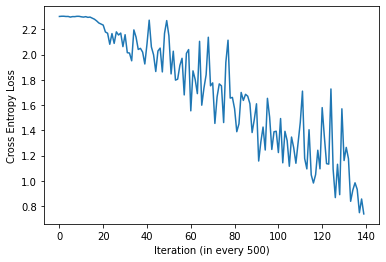

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()